In [2]:
import numpy as np
import torch 
from scipy import special
import sys 

In [2]:
## pip install svgwrite

## circuit_draw

In [3]:
import circuit
import gate 
import draw
import state
import numpy as np
import torch 
from scipy import special
import sys 

In [9]:
nmode = 200
ndevice = 5000
test_cir = circuit.QumodeCircuit(nmode=nmode,init_state=[1]*200, name="test", cutoff = 3, basis = True) # basis=True, using state list 

for i in range(ndevice):
    j = np.random.uniform(-1,1)
    if j>0:
        test_cir.ps(np.random.uniform(0,2*np.pi),wires=[int(np.random.choice(np.arange(nmode)))])
    else:
        k = int(np.random.choice(np.arange(nmode-1)))
        test_cir.bs(np.random.uniform(0,2*np.pi),wires=[k,k+1])

In [7]:
test_cir.draw()

too many wires in the circuit, run circuit.save for the complete circuit


In [6]:
test_cir.save("200_mode.svg")

## circuit evolve, calculating permanent

conda create -n perceval       #create new env for install perceval 

pip install perceval-quandela    #intsall perceval

In [8]:
import perceval as pcvl
import perceval.components as comp 
from perceval . components import BS
import numpy as np

import circuit
import gate 
import draw 
import state 

In [10]:
nmode = 5
ndevice = 100

ini_state = [1, 1, 1,1,1]
test_gate = ( pcvl . Circuit (nmode, name =" test1 "))

dq_gate = circuit.QumodeCircuit(nmode=nmode, init_state=ini_state, name="test", cutoff = sum(ini_state)+1, basis = True) # basis=True, using state list

for i in range(ndevice): ## take the random circuit
    j = np.random.uniform(-1,1)
    if j>0:
        temp_1 = int(np.random.choice(np.arange(nmode)))
        angle_1 = np.random.uniform(0,2*np.pi)
        test_gate.add((temp_1),comp.PS(angle_1))
        dq_gate.ps(angle_1, [temp_1])
    else:
        k = int(np.random.choice(np.arange(nmode-1)))
        angle_2 = np.random.uniform(0,2*np.pi)
        test_gate.add((k,k+1), BS.Rx(angle_2))
        dq_gate.bs(angle_2/2, [k, k+1])
        

for perceval

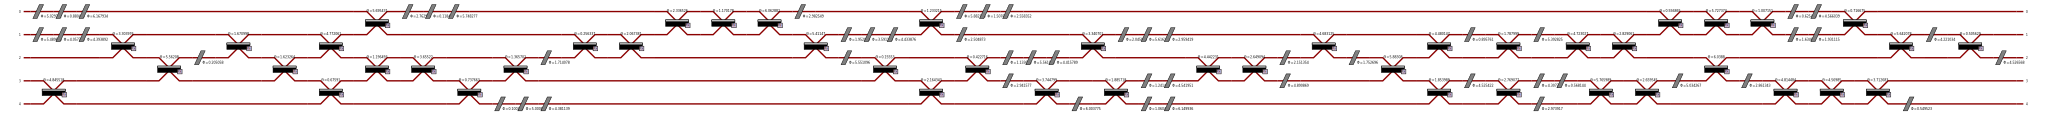

In [11]:
pcvl.pdisplay(test_gate)

In [12]:
dq_gate.draw()

In [13]:
ini_state = ini_state
backend = pcvl.BackendFactory().get_backend("Naive")
backend.set_circuit(test_gate)
input_state=pcvl.BasicState(ini_state)
backend.set_input_state(input_state)
re1 = backend.evolve()
re1

StateVector(float,
            {|5,0,0,0,0>: (0.05632176154070334+0.049604008536537035j),
             |4,1,0,0,0>: (-0.01347906252210945+0.07659957686693773j),
             |4,0,1,0,0>: (-0.05776329796131524+0.05028894039572351j),
             |4,0,0,1,0>: (-0.09998123860039186+0.034944667131677556j),
             |4,0,0,0,1>: (0.019083697725105896-0.05519939366854066j),
             |3,2,0,0,0>: (-0.05225204761591614+0.019296515622291992j),
             |3,1,1,0,0>: (0.1069241994615556+0.051815369048882835j),
             |3,1,0,1,0>: (-0.050310907686122674-0.08552608696213454j),
             |3,1,0,0,1>: (0.062057635536076614+0.0029829346223499958j),
             |3,0,2,0,0>: (-0.10057254684277502+0.03544042657406117j),
             |3,0,1,1,0>: (0.004951835108915409-0.12649612746337463j),
             |3,0,1,0,1>: (-0.016415799303598377+0.00465914598337746j),
             |3,0,0,2,0>: (-0.017598351912152293-0.07363302329714633j),
             |3,0,0,1,1>: (0.02063960737788815-0.005

for deepquantum

In [14]:
dq_gate.draw()

In [15]:
re2 = dq_gate()
re2 

{|11111>: tensor([0.0725+0.0730j], grad_fn=<ReshapeAliasBackward0>),
 |11021>: tensor([0.0157-0.0133j], grad_fn=<ReshapeAliasBackward0>),
 |12011>: tensor([0.0458+0.0643j], grad_fn=<ReshapeAliasBackward0>),
 |10112>: tensor([0.0734+0.0452j], grad_fn=<ReshapeAliasBackward0>),
 |11201>: tensor([0.1100+0.0140j], grad_fn=<ReshapeAliasBackward0>),
 |01121>: tensor([0.1528-0.0291j], grad_fn=<ReshapeAliasBackward0>),
 |20111>: tensor([0.1185-0.0094j], grad_fn=<ReshapeAliasBackward0>),
 |10121>: tensor([0.0046+0.0082j], grad_fn=<ReshapeAliasBackward0>),
 |10211>: tensor([0.0144+0.0303j], grad_fn=<ReshapeAliasBackward0>),
 |01211>: tensor([0.0512-0.0121j], grad_fn=<ReshapeAliasBackward0>),
 |11210>: tensor([0.0821-0.0542j], grad_fn=<ReshapeAliasBackward0>),
 |11102>: tensor([0.0114+0.1469j], grad_fn=<ReshapeAliasBackward0>),
 |21101>: tensor([0.0373-0.0213j], grad_fn=<ReshapeAliasBackward0>),
 |12101>: tensor([-0.0853+0.0096j], grad_fn=<ReshapeAliasBackward0>),
 |02111>: tensor([0.0232-0.0085j]

In [16]:
## calculating the difference for two simu approach
for key in re1.keys():
    key2 = list(key)
    key3 = state.FockState(5, key2)
    print(key3, abs(re2[key3]-re1[key]))

|50000> tensor([6.6327e-08], grad_fn=<AbsBackward0>)
|41000> tensor([1.1397e-07], grad_fn=<AbsBackward0>)
|40100> tensor([5.3338e-08], grad_fn=<AbsBackward0>)
|40010> tensor([7.8585e-08], grad_fn=<AbsBackward0>)
|40001> tensor([1.4079e-07], grad_fn=<AbsBackward0>)
|32000> tensor([1.7096e-07], grad_fn=<AbsBackward0>)
|31100> tensor([6.3220e-08], grad_fn=<AbsBackward0>)
|31010> tensor([1.3964e-07], grad_fn=<AbsBackward0>)
|31001> tensor([4.7274e-08], grad_fn=<AbsBackward0>)
|30200> tensor([1.1373e-07], grad_fn=<AbsBackward0>)
|30110> tensor([8.9891e-08], grad_fn=<AbsBackward0>)
|30101> tensor([1.3133e-07], grad_fn=<AbsBackward0>)
|30020> tensor([1.8626e-08], grad_fn=<AbsBackward0>)
|30011> tensor([1.0344e-07], grad_fn=<AbsBackward0>)
|30002> tensor([4.7707e-08], grad_fn=<AbsBackward0>)
|23000> tensor([3.0320e-07], grad_fn=<AbsBackward0>)
|22100> tensor([1.1397e-07], grad_fn=<AbsBackward0>)
|22010> tensor([1.5342e-07], grad_fn=<AbsBackward0>)
|22001> tensor([8.1956e-08], grad_fn=<AbsBackw

## test fockstate  and tensor state

In [21]:
ini_state1 = [(1,[1,1,1,1])] # can be superposition state
ini_state2 = [1, 1,1,1]
test_cir1 = circuit.QumodeCircuit(nmode=4, init_state=ini_state1, name="test", cutoff = 5, basis=False) # using   state tensor
test_cir2 = circuit.QumodeCircuit(nmode=4, init_state=ini_state2, name="test", cutoff = 5, basis=True) # using state list


test_cir1.ps(np.pi/4, wires=[0])
test_cir1.ps(np.pi/4, wires=[1])
test_cir1.ps(np.pi/4, wires=[3])
test_cir1.bs(np.pi/4, wires=[0,1 ])
test_cir1.bs(np.pi/4, wires=[2,3])
test_cir1.bs(np.pi/4, wires=[1,2 ])



test_cir2.ps(np.pi/4, wires=[0])
test_cir2.ps(np.pi/4, wires=[1])
test_cir2.ps(np.pi/4, wires=[3])
test_cir2.bs(np.pi/4, wires=[0,1 ])
test_cir2.bs(np.pi/4, wires=[2,3])
test_cir2.bs(np.pi/4, wires=[1,2 ])

test_cir1.draw()

In [30]:
re1 = test_cir1()
re1.shape , re1[2,0,0,2]

(torch.Size([5, 5, 5, 5]), tensor(0.3536-0.3536j, grad_fn=<SelectBackward0>))

In [24]:
test_cir2.draw()

In [27]:
test_cir2()

{|2002>: tensor([0.3536-0.3536j], grad_fn=<ReshapeAliasBackward0>),
 |0112>: tensor([0.2500+0.2500j], grad_fn=<ReshapeAliasBackward0>),
 |2110>: tensor([0.2500+0.2500j], grad_fn=<ReshapeAliasBackward0>),
 |0040>: tensor([-0.2165+0.2165j], grad_fn=<ReshapeAliasBackward0>),
 |0400>: tensor([-0.2165+0.2165j], grad_fn=<ReshapeAliasBackward0>),
 |0202>: tensor([0.1768-0.1768j], grad_fn=<ReshapeAliasBackward0>),
 |0022>: tensor([-0.1768+0.1768j], grad_fn=<ReshapeAliasBackward0>),
 |0220>: tensor([-0.1768+0.1768j], grad_fn=<ReshapeAliasBackward0>),
 |2200>: tensor([-0.1768+0.1768j], grad_fn=<ReshapeAliasBackward0>),
 |2020>: tensor([0.1768-0.1768j], grad_fn=<ReshapeAliasBackward0>),
 |0103>: tensor([4.8667e-08-1.4600e-07j], grad_fn=<ReshapeAliasBackward0>),
 |0211>: tensor([3.1610e-08+1.2644e-07j], grad_fn=<ReshapeAliasBackward0>),
 |1210>: tensor([0.+1.2644e-07j], grad_fn=<ReshapeAliasBackward0>),
 |1030>: tensor([1.2167e-08+1.0646e-07j], grad_fn=<ReshapeAliasBackward0>),
 |3001>: tensor([-9

In [31]:
re1 = test_cir1()  ## tensor
re2 = test_cir2()  ##  dic

In [32]:
# compare the difference
for i in re2.keys():
    temp = i.state.tolist()
    print(temp, abs(re1[tuple(temp)]- re2[i]))

[2, 0, 0, 2] tensor([2.9802e-08], grad_fn=<AbsBackward0>)
[0, 1, 1, 2] tensor([1.2818e-07], grad_fn=<AbsBackward0>)
[2, 1, 1, 0] tensor([7.5981e-08], grad_fn=<AbsBackward0>)
[0, 0, 4, 0] tensor([9.4243e-08], grad_fn=<AbsBackward0>)
[0, 4, 0, 0] tensor([8.4294e-08], grad_fn=<AbsBackward0>)
[0, 2, 0, 2] tensor([1.0537e-07], grad_fn=<AbsBackward0>)
[0, 2, 2, 0] tensor([5.3727e-08], grad_fn=<AbsBackward0>)
[2, 2, 0, 0] tensor([6.6640e-08], grad_fn=<AbsBackward0>)
[0, 0, 2, 2] tensor([6.6640e-08], grad_fn=<AbsBackward0>)
[2, 0, 2, 0] tensor([6.1439e-08], grad_fn=<AbsBackward0>)
[0, 1, 0, 3] tensor([1.5390e-07], grad_fn=<AbsBackward0>)
[0, 2, 1, 1] tensor([1.3033e-07], grad_fn=<AbsBackward0>)
[1, 2, 1, 0] tensor([1.2644e-07], grad_fn=<AbsBackward0>)
[1, 0, 3, 0] tensor([1.0715e-07], grad_fn=<AbsBackward0>)
[3, 0, 0, 1] tensor([1.0033e-07], grad_fn=<AbsBackward0>)
[0, 3, 1, 0] tensor([9.8091e-08], grad_fn=<AbsBackward0>)
[1, 1, 0, 2] tensor([9.4243e-08], grad_fn=<AbsBackward0>)
[1, 0, 1, 2] t

In [36]:
## measurement
re1_measure = test_cir1.measure([0,3])
re2_measure = test_cir2.measure([0,3])
re1_measure,  re2_measure

([{'|02>': 246, '|20>': 240, '|22>': 271, '|00>': 267}],
 [{|20>: 243, |22>: 258, |02>: 256, |00>: 267}])

## test any gate

In [46]:
import circuit
import gate 
import draw
import state
import numpy as np
import torch 
from scipy import special
import sys 
import photonic_qmath

In [47]:
## check evolving u_any
U1 = np.load("6mode_cnot_1110_00.npy")
U2 =np.load("6mode_cnot_1110_10.npy")

In [48]:
test = torch.zeros([2, 3, 3, 3, 3, 3, 3])*1j
ini_state1 = [(np.sqrt(3)/3, [0, 1, 1, 0, 0, 0]), (np.sqrt(3)/3*1j, [0, 1, 0, 1, 0, 0]), (np.sqrt(3)/3,[0,0,0,0,1,1])]
ini_state1_1 =  [(np.sqrt(2)/2, [0, 1, 1, 0, 0, 0]), (np.sqrt(2)/2*1j, [0, 1, 0, 1, 0, 0])]
ini_state1_2 =  [(1, [0, 1, 1, 0, 0, 0])]
test[0] = state.FockState(state=ini_state1, basis=False).state
test[1] = state.FockState(state=ini_state1_1, basis=False).state
ini_state2 = [0, 1, 1, 0, 0, 0]
test_cir1 = circuit.QumodeCircuit(nmode=6, init_state=test, name="test1", cutoff = 3, basis=False) # using tensor state
test_cir2 = circuit.QumodeCircuit(nmode=6, init_state=ini_state2, name="test2", cutoff = 3, basis=True) # using state list

# test_cir1.ps(np.pi/4, wires=[0])
# test_cir1.ps(np.pi/4, wires=[1])
test_cir1.any(U2, wires=list(range(6)))

# test_cir2.ps(np.pi/4, wires=[0])
# test_cir2.ps(np.pi/4, wires=[1])
test_cir2.any(U2, wires=list(range(6)))

test_cir1.draw()

In [58]:
test_cir1.init_state # for batch input, each dimesion can be superposition state

State0: (0.577+0.000j)|000011>+(0.000+0.577j)|010100>+(0.577+0.000j)|011000>
State1: (0.000+0.707j)|010100>+(0.707+0.000j)|011000>

In [60]:
test_cir2.init_state  # only pure basis state

|011000>

In [61]:
re1 = test_cir1()
re2 = test_cir2()
re2_2 = test_cir2([0, 1, 0, 1, 0, 0]) # change the initial


In [62]:
re1[0,1,0,1,0,0]

tensor([-0.0286+3.9713e-12j,  0.0000+0.0000e+00j,  0.0000+0.0000e+00j])

## test measurement

In [63]:
re1 = test_cir1()
measure_re1 = test_cir1.measure(shots=10)
measure_re1

[{'|200000>': 2,
  '|001010>': 1,
  '|020000>': 1,
  '|000110>': 3,
  '|000101>': 1,
  '|002000>': 1,
  '|010010>': 1},
 {'|020000>': 1,
  '|000200>': 3,
  '|010001>': 1,
  '|001001>': 1,
  '|010010>': 1,
  '|001100>': 1,
  '|000110>': 1,
  '|002000>': 1}]

In [64]:
measure_re2 = test_cir2.measure(shots=10)
measure_re2


[{|010010>: 2,
  |020000>: 1,
  |001010>: 1,
  |000110>: 2,
  |000200>: 2,
  |011000>: 1,
  |001100>: 1}]

In [65]:
re = test_cir2()

In [66]:
re = test_cir2([0, 1, 0, 1, 0, 0])
re 

{|020000>: tensor([0.4714+0.j]),
 |000200>: tensor([-0.4714+0.j]),
 |011000>: tensor([0.3333+0.j]),
 |001100>: tensor([-0.3333+0.j]),
 |010010>: tensor([-0.3063+0.j]),
 |001010>: tensor([-0.3063+0.j]),
 |000110>: tensor([-0.3063+0.j]),
 |000101>: tensor([0.1314+0.j]),
 |010001>: tensor([0.1314+0.j]),
 |001001>: tensor([0.1314+0.j]),
 |110000>: tensor([2.0635e-11+0.j]),
 |100010>: tensor([-1.2642e-11+0.j]),
 |101000>: tensor([6.8785e-12+0.j]),
 |100100>: tensor([-6.8785e-12+0.j]),
 |100001>: tensor([5.4248e-12+0.j]),
 |200000>: tensor([4.0147e-22+0.j]),
 |000011>: tensor([0.+0.j]),
 |010100>: tensor([0.+0.j]),
 |002000>: tensor([0.+0.j]),
 |000002>: tensor([0.+0.j]),
 |000020>: tensor([0.+0.j])}

In [67]:
re = test_cir1.measure([1,2,3], shots=100)
re 

[{'|010>': 8,
  '|001>': 15,
  '|000>': 22,
  '|020>': 17,
  '|200>': 16,
  '|100>': 7,
  '|011>': 4,
  '|110>': 4,
  '|101>': 3,
  '|002>': 4},
 {'|200>': 20,
  '|110>': 10,
  '|100>': 10,
  '|001>': 16,
  '|011>': 13,
  '|010>': 7,
  '|020>': 12,
  '|101>': 4,
  '|002>': 8}]

In [68]:
measure_re = test_cir2.measure(measure_wires=[0,3])
measure_re

[{|02>: 250, |00>: 570, |01>: 204}]

## measurement and  encoding angle infos

In [69]:
import circuit
import gate 
import draw
import state
import numpy as np
import torch 
from scipy import special
import sys 
import photonic_qmath

### single measurement without encoding infos

In [70]:
ini_state1 = [1,1,1,1]
ini_state2 = [(1,[1, 1, 1, 1])]

test_circ1 =  circuit.QumodeCircuit(nmode=4, init_state=ini_state1, name="test1", cutoff = 5, basis=True) # using tensor state
test_circ2 =  circuit.QumodeCircuit(nmode=4, init_state=ini_state2, name="test1", cutoff = 5, basis=False) # using tensor state

# test_circ1.ps(np.pi/4, [0], encode=True)
# test_circ1.ps(np.pi/4, [1], encode=True)
# test_circ1.ps(np.pi/4, [2], encode=True)
# test_circ1.ps(np.pi/4, [3], encode=True)
test_circ1.bs(np.pi/4, [0, 1], encode=True)
test_circ1.bs(np.pi/4, [2, 3], encode=True)
test_circ1.bs(np.pi/4, [1, 2], encode=True)


# test_circ2.ps(np.pi/4, [0], encode=True)
# test_circ2.ps(np.pi/4, [1], encode=True)
# test_circ2.ps(np.pi/4, [2], encode=True)
# test_circ2.ps(np.pi/4, [3], encode=True)
test_circ2.bs(np.pi/4, [0, 1], encode=True)
test_circ2.bs(np.pi/4, [2, 3], encode=True)
test_circ2.bs(np.pi/4, [1, 2], encode=True)

test_circ1.draw()


In [71]:
test_circ2.draw()

In [72]:
test_circ1.init_state, test_circ2.init_state

(|1111>, State0: (1.000+0.000j)|1111>)

In [77]:
re1 = test_circ1()  # evolve the circuit
re2 = test_circ2()

In [78]:
re1 

{|2002>: tensor([-0.5000-1.4901e-08j]),
 |2110>: tensor([-3.6528e-08-0.3536j]),
 |0112>: tensor([4.2147e-08-0.3536j]),
 |0400>: tensor([0.3062-2.1292e-08j]),
 |0040>: tensor([0.3062+5.5155e-08j]),
 |0202>: tensor([-0.2500+0.j]),
 |2200>: tensor([0.2500-8.9407e-08j]),
 |0220>: tensor([0.2500+4.9605e-10j]),
 |2020>: tensor([-0.2500+5.9605e-08j]),
 |0022>: tensor([0.2500+5.9605e-08j]),
 |1120>: tensor([1.2644e-07-4.2147e-08j]),
 |1102>: tensor([4.2147e-08+8.4294e-08j]),
 |0301>: tensor([7.3000e-08-4.8667e-08j]),
 |1021>: tensor([2.1073e-08-8.4294e-08j]),
 |1111>: tensor([-7.4506e-09-5.9605e-08j]),
 |1012>: tensor([-4.2147e-08-4.2147e-08j]),
 |0103>: tensor([4.8667e-08+2.4333e-08j]),
 |1201>: tensor([2.1073e-08-4.2147e-08j]),
 |2101>: tensor([0.+4.2147e-08j]),
 |0211>: tensor([0.-4.2147e-08j]),
 |0031>: tensor([-2.4333e-08-2.4333e-08j]),
 |0130>: tensor([0.+3.4066e-08j]),
 |3001>: tensor([-2.4333e-08-6.0834e-09j]),
 |1030>: tensor([0.+2.4333e-08j]),
 |3100>: tensor([-2.4333e-08+0.j]),
 |10

In [79]:
m1 = test_circ1.measure([0,3])
m1 

[{|22>: 271, |02>: 258, |20>: 243, |00>: 252}]

In [80]:
m2 = test_circ2.measure([0,3])
m2 

[{'|22>': 253, '|00>': 270, '|20>': 254, '|02>': 247}]

### encoding angle infos

In [105]:
nparas = 3
batch = 2 
# data = torch.sin(torch.tensor(list(range(batch * nparas)))).reshape(batch, nparas)
data = (torch.tensor([np.pi/4]*batch*nparas).reshape(batch, nparas))
print(data)

tensor([[0.7854, 0.7854, 0.7854],
        [0.7854, 0.7854, 0.7854]])


In [106]:
re1_data = test_circ1(data=data)

In [107]:
re1_data

{|2002>: tensor([[-0.5000-1.4901e-08j],
         [-0.5000-1.4901e-08j]]),
 |0112>: tensor([[4.2147e-08-0.3536j],
         [4.2147e-08-0.3536j]]),
 |2110>: tensor([[-3.6528e-08-0.3536j],
         [-3.6528e-08-0.3536j]]),
 |0400>: tensor([[0.3062-2.1292e-08j],
         [0.3062-2.1292e-08j]]),
 |0040>: tensor([[0.3062+5.5155e-08j],
         [0.3062+5.5155e-08j]]),
 |0202>: tensor([[-0.2500+0.j],
         [-0.2500+0.j]]),
 |2200>: tensor([[0.2500-8.9407e-08j],
         [0.2500-8.9407e-08j]]),
 |0220>: tensor([[0.2500+4.9605e-10j],
         [0.2500+4.9605e-10j]]),
 |0022>: tensor([[0.2500+5.9605e-08j],
         [0.2500+5.9605e-08j]]),
 |2020>: tensor([[-0.2500+5.9605e-08j],
         [-0.2500+5.9605e-08j]]),
 |1120>: tensor([[1.2644e-07-4.2147e-08j],
         [1.2644e-07-4.2147e-08j]]),
 |1102>: tensor([[4.2147e-08+8.4294e-08j],
         [4.2147e-08+8.4294e-08j]]),
 |0301>: tensor([[7.3000e-08-4.8667e-08j],
         [7.3000e-08-4.8667e-08j]]),
 |1021>: tensor([[2.1073e-08-8.4294e-08j],
     

In [108]:
re2_data = test_circ2(data=data)
re2_data.shape

torch.Size([2, 5, 5, 5, 5])

In [109]:
test_circ2.draw()

In [110]:
m1 = test_circ1.measure([0,3])
m1 

[{|22>: 257, |00>: 258, |20>: 254, |02>: 255},
 {|22>: 273, |20>: 243, |02>: 268, |00>: 240}]

In [111]:
m2 = test_circ2.measure([0,3])
m2 

[{'|02>': 248, '|22>': 246, '|00>': 274, '|20>': 256},
 {'|22>': 246, '|00>': 228, '|20>': 290, '|02>': 260}]

 ### test batch input state

In [112]:
ini_state2_1 = [(1,[1, 1, 1, 1])]
ini_state2_2 = [(1,[1, 1, 0, 0])]

test = torch.zeros([2, 5, 5, 5, 5])*1j
test[0] = state.FockState(state=ini_state2_1,cutoff=5, basis=False).state
test[1] = state.FockState(state=ini_state2_2,cutoff=5, basis=False).state

test_circ3 =  circuit.QumodeCircuit(nmode=4, init_state=test, name="test1", cutoff = 5, basis=False) # using tensor state

test_circ3.bs(np.pi/4, [0, 1], encode=True)
test_circ3.bs(np.pi/4, [2, 3], encode=True)
test_circ3.bs(np.pi/4, [1, 2], encode=True)

test_circ3.draw()

In [113]:
test_circ3.init_state

State0: (1.000+0.000j)|1111>
State1: (1.000+0.000j)|1100>

In [114]:
re3 = test_circ3()
test_circ3.measure([0,3])

[{'|22>': 239, '|00>': 245, '|02>': 280, '|20>': 260},
 {'|20>': 507, '|00>': 517}]

In [115]:
nparas = 3
batch = 2 
# data = torch.sin(torch.tensor(list(range(batch * nparas)))).reshape(batch, nparas)
data = (torch.tensor([np.pi/2]*batch*nparas).reshape(batch, nparas))
print(data)

tensor([[1.5708, 1.5708, 1.5708],
        [1.5708, 1.5708, 1.5708]])


In [116]:
re3_data = test_circ3(data=data)

In [117]:
test_circ3.measure([0,3])

[{'|11>': 1024}, {'|10>': 1024}]

In [118]:
test_circ3.draw()

In [99]:
# vmap test
# from torch import vmap
# def f(x, y):
#   x.add_(y)
#   print(x,y)
#   return x

# x = torch.randn(1)
# y = torch.randn(3,1)  # When vmapped over, looks like it has shape [1]

# Raises an error because `x` has fewer elements than `y`.
